# Learn how to detect frontal faces for clustering

or how to do perform face frontalization

In [1]:
import mtcnn
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

### Images

In [2]:
pnet,rnet,onet = mtcnn.get_net_caffe('../src/FaceDetector/output/caffe_models/')
detector = mtcnn.FaceDetector(pnet, rnet, onet, device='cuda:0',)

/usr/local/lib/python3.7/dist-packages/mtcnn/network/mtcnn_pytorch.py:9: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(m.weight.data)
/usr/local/lib/python3.7/dist-packages/mtcnn/network/mtcnn_pytorch.py:10: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(m.bias, 0.1)


In [3]:
shots = glob.glob('../data/raw/juul_shots/*.jpg', )
print(shots)

['../data/raw/juul_shots/2004.jpg', '../data/raw/juul_shots/3006.jpg', '../data/raw/juul_shots/2505.jpg', '../data/raw/juul_shots/5511.jpg', '../data/raw/juul_shots/4509.jpg', '../data/raw/juul_shots/0.jpg', '../data/raw/juul_shots/501.jpg', '../data/raw/juul_shots/5010.jpg', '../data/raw/juul_shots/1002.jpg', '../data/raw/juul_shots/1503.jpg', '../data/raw/juul_shots/4008.jpg', '../data/raw/juul_shots/3507.jpg']


### Detect faces mtcnn

In [5]:
index = 4
print(shots[index])

bgr = cv2.imread(shots[index])
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
box,lmk = detector.detect(bgr, minsize=50, threshold=[0.6,0.7,0.9])
print('detections', len(box))

../data/raw/juul_shots/4509.jpg
detections 3


In [6]:
img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

img = mtcnn.utils.draw.draw_boxes2(img, box, color=(255,0,255))
img = mtcnn.utils.draw.batch_draw_landmarks(img, lmk, color=(0,255,255))

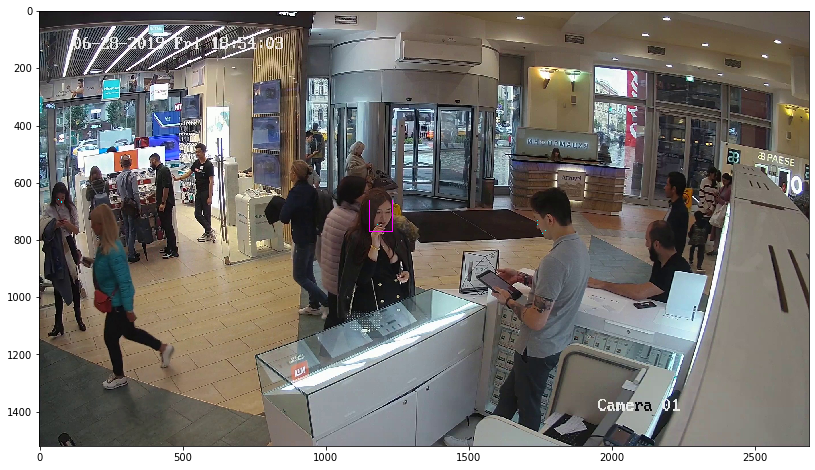

In [7]:
plt.figure(figsize=(17,8));
plt.imshow(img, );

##### mtcnn landmarks

In [8]:
images = []
boxes = box.cpu().numpy()
for b in boxes:
    images.append(img[b[1]:b[3], b[0]:b[2], :])

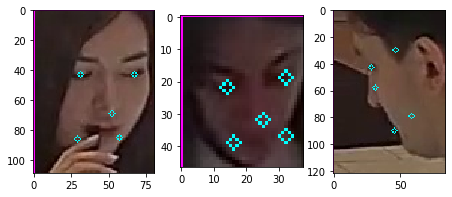

In [9]:
fig,axes = plt.subplots(1, len(images), figsize=(len(images)*2.5, 3, ), squeeze=False)
for c,image in enumerate(images):
    axes[0, c].imshow(image)
plt.show()

##### dlib landmarks

In [181]:
import dlib

In [182]:
shape_predictor = dlib.shape_predictor('/home/neuro/dlib/shape_predictor_5_face_landmarks.dat')

In [183]:
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

In [184]:
images = []
for b in boxes:
    shape = shape_predictor(rgb, dlib.rectangle(*b))
    for part in shape.parts():
        rgb = cv2.circle(rgb, (part.x, part.y), 2, (255,255,0), 2)
    images.append(rgb[b[1]:b[3], b[0]:b[2], :])

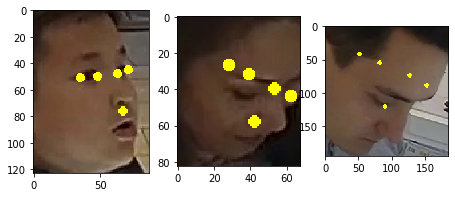

In [185]:
fig,axes = plt.subplots(1, len(images), figsize=(len(images)*2.5, 3), squeeze=False)
for c,image in enumerate(images):
    axes[0, c].imshow(image)
plt.show()

##### opencv eye detector

In [190]:
eye_detector = cv2.CascadeClassifier('../models/external/haarcascade_eye.xml')
eyepair_detector = cv2.CascadeClassifier('../models/external/haarcascade_frontalface_default.xml')

In [191]:
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

In [188]:
gray_crops = []
for b in boxes:
    crop = gray[b[1]:b[3], b[0]:b[2]]
    eyes = eye_detector.detectMultiScale(crop)
    for (ex,ey,ew,eh) in eyes:
        crop = cv2.rectangle(crop,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    gray_crops.append(crop)

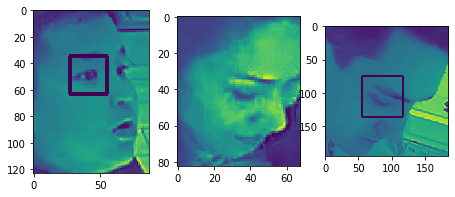

In [189]:
n = len(gray_crops)
fig,axes = plt.subplots(1, n, figsize=(n*2.5, 3), squeeze=False)
for c,image in enumerate(gray_crops):
    axes[0, c].imshow(image)
plt.show()

### Summary

1. Use 5 landmarks from mtcnn and check that nose is inside bounding box formed by 2 eyes and mouth edges